In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# 1. Load and Inspect the Dataset
# Load the Titanic dataset (or replace with your dataset)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)


In [13]:

# Display basic information
print("Shape of the dataset:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nNumber of missing values:\n", data.isnull().sum())
print("\nSummary statistics:\n", data.describe())

Shape of the dataset: (891, 12)

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Number of missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0

In [15]:
# 2. Basic Statistical Measures
# Compute measures of spread
def compute_spread(df, column):
    spread_metrics = {
        'Range': df[column].max() - df[column].min(),
        'Variance': df[column].var(),
        'Standard Deviation': df[column].std(),
        'IQR': df[column].quantile(0.75) - df[column].quantile(0.25)
    }
    return spread_metrics

numerical_columns = data.select_dtypes(include=['number']).columns
spread_results = {}
for col in numerical_columns:
    spread_results[col] = compute_spread(data, col)

print("\nMeasures of Spread:")
for col, metrics in spread_results.items():
    print(f"{col}: {metrics}")


Measures of Spread:
PassengerId: {'Range': 890, 'Variance': 66231.0, 'Standard Deviation': 257.3538420152301, 'IQR': 445.0}
Survived: {'Range': 1, 'Variance': 0.2367722165474984, 'Standard Deviation': 0.4865924542648585, 'IQR': 1.0}
Pclass: {'Range': 2, 'Variance': 0.6990151199889065, 'Standard Deviation': 0.8360712409770513, 'IQR': 1.0}
Age: {'Range': 79.58, 'Variance': 211.0191247463081, 'Standard Deviation': 14.526497332334044, 'IQR': 17.875}
SibSp: {'Range': 8, 'Variance': 1.2160430774662894, 'Standard Deviation': 1.1027434322934275, 'IQR': 1.0}
Parch: {'Range': 6, 'Variance': 0.6497282437357467, 'Standard Deviation': 0.8060572211299559, 'IQR': 0.0}
Fare: {'Range': 512.3292, 'Variance': 2469.436845743117, 'Standard Deviation': 49.693428597180905, 'IQR': 23.0896}


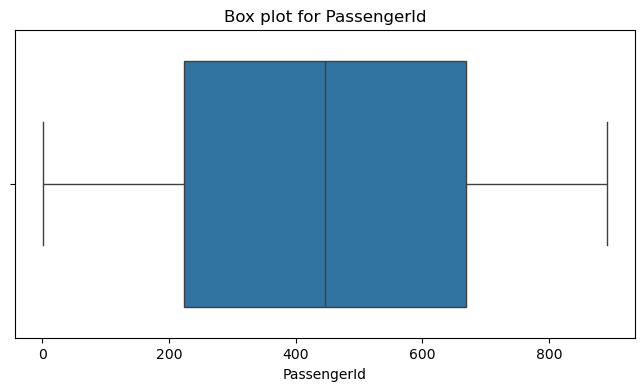

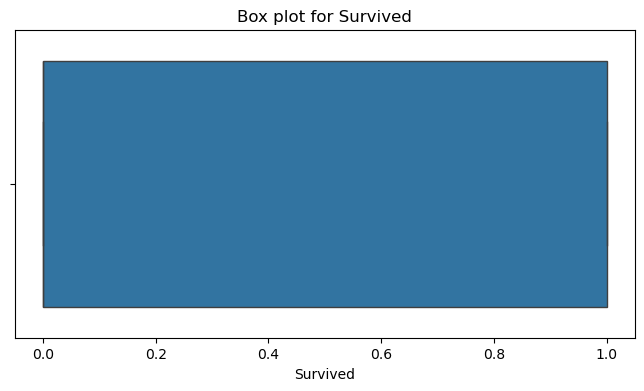

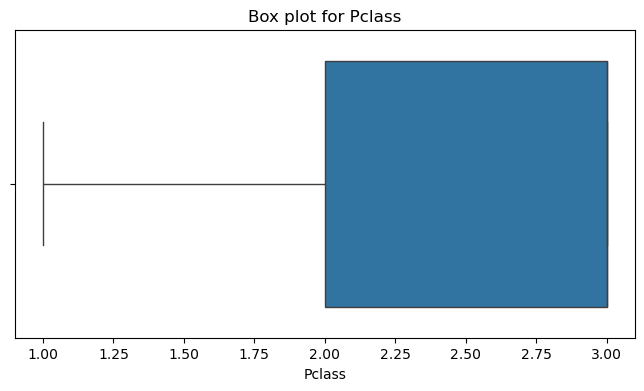

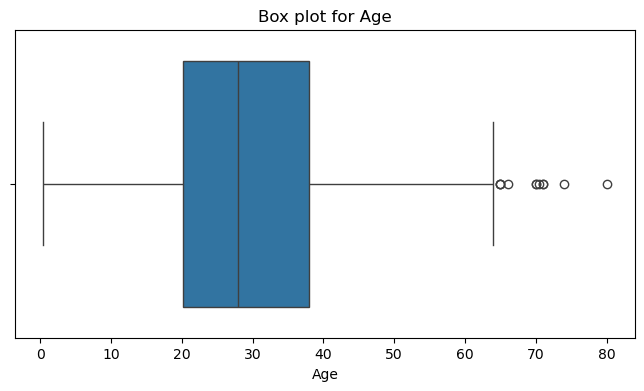

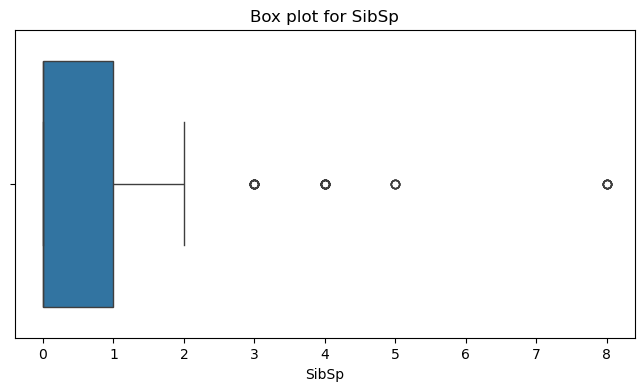

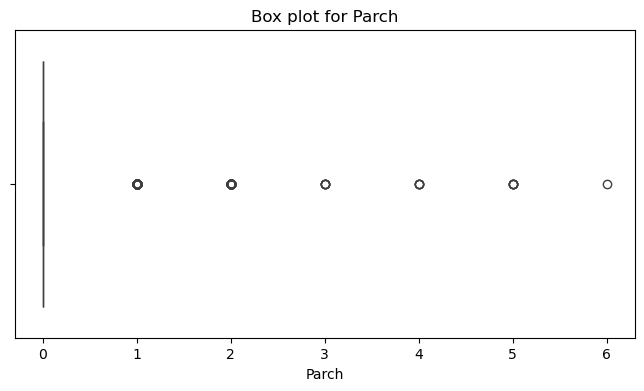

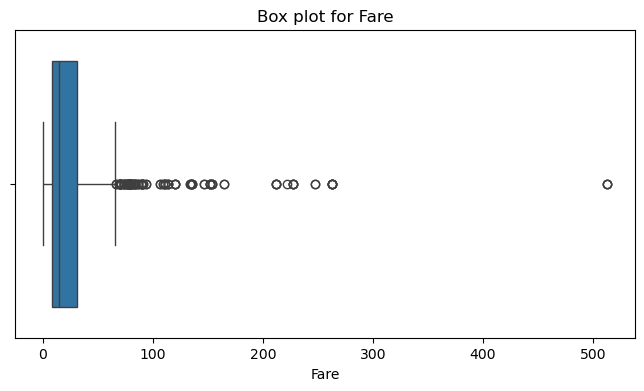

In [17]:
# Identify outliers using box plots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Box plot for {col}")
    plt.show()

In [19]:

# 3. Encoding Categorical Data
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_columns.tolist())


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [21]:
# Label Encoding
label_encoder = LabelEncoder()
data_encoded = data.copy()
for col in categorical_columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col].astype(str))

print("\nData after Label Encoding:\n", data_encoded.head())


Data after Label Encoding:
    PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500    147         2  
1  71.2833     81         0  
2   7.9250    147         2  
3  53.1000     55         2  
4   8.0500    147         2  


In [23]:
# One-Hot Encoding
data_onehot = pd.get_dummies(data, columns=categorical_columns)
print("\nData after One-Hot Encoding:\n", data_onehot.head())


Data after One-Hot Encoding:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                     False                             False   
1                     False                             False   
2                     False                             False   
3                     False                             False   
4                     False                             False   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  ...  Cabin_F G73  Cabin_F2  \
0                                  False  ...        False     False   
1                                  False  .

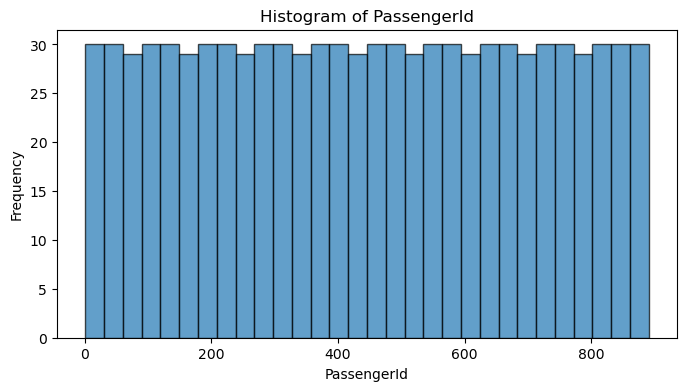

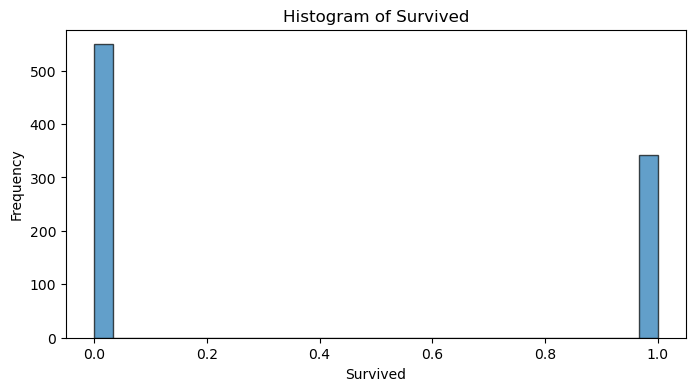

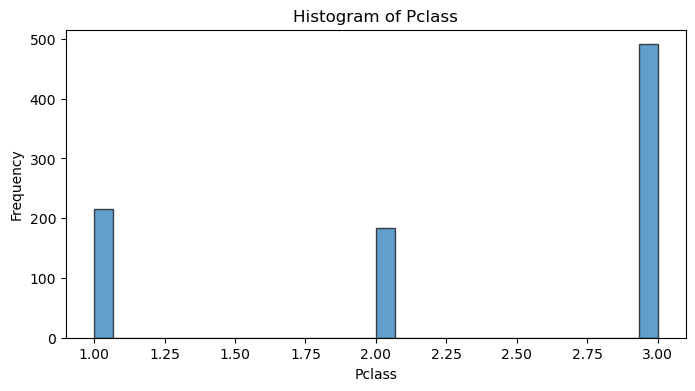

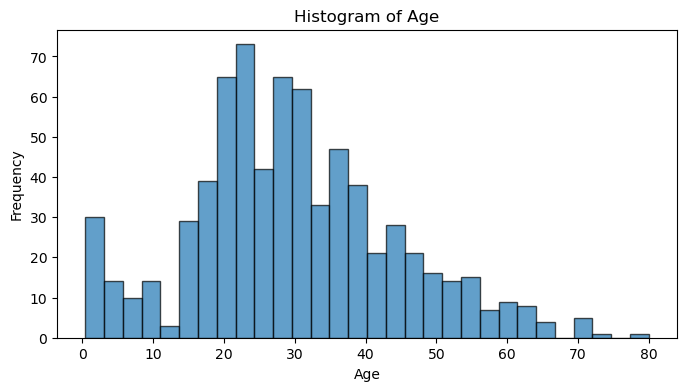

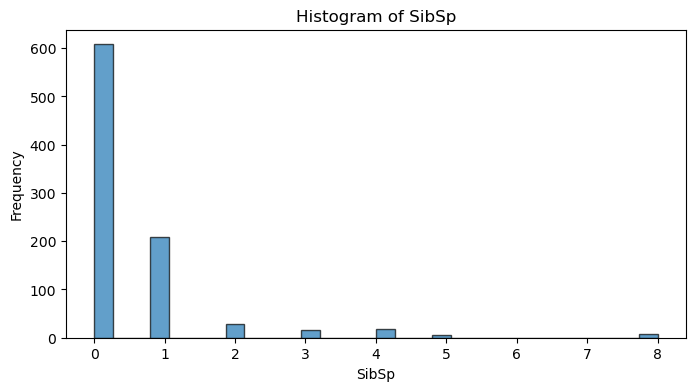

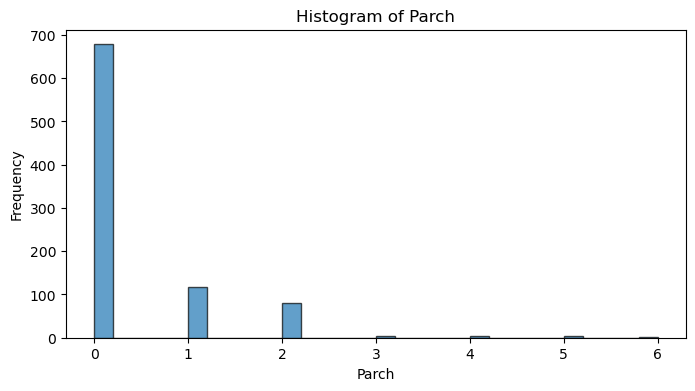

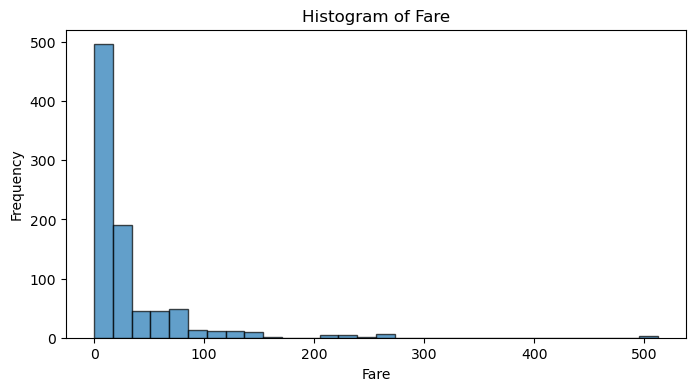

In [25]:
# 4. Data Visualization
# Histogram for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

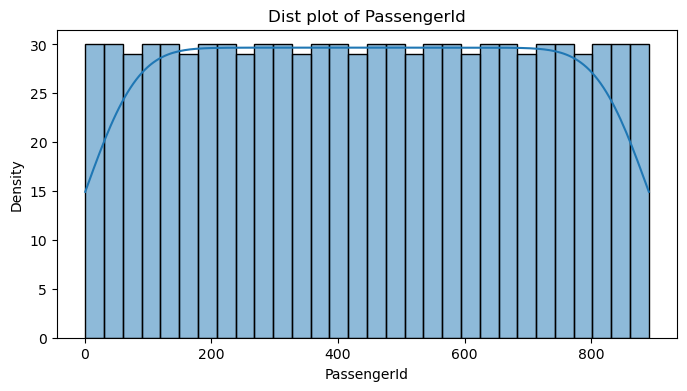

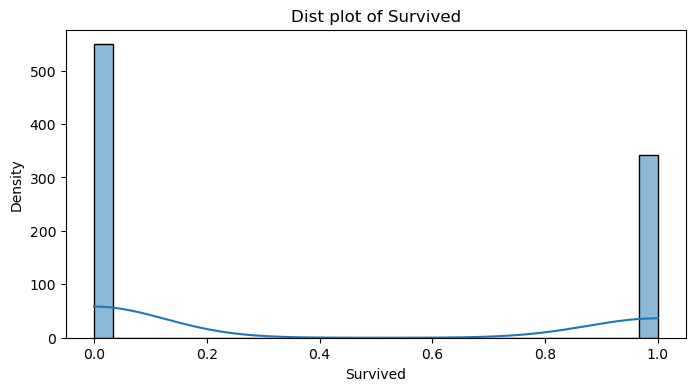

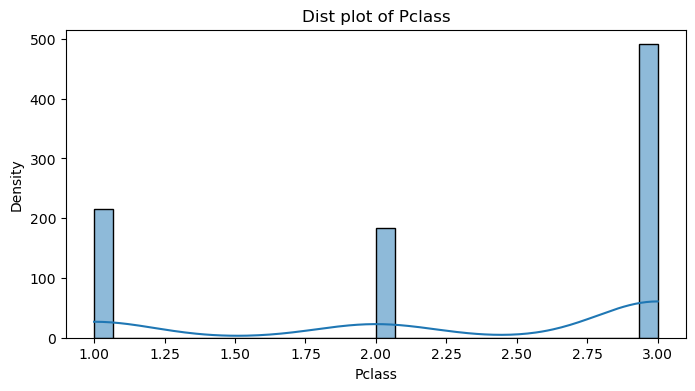

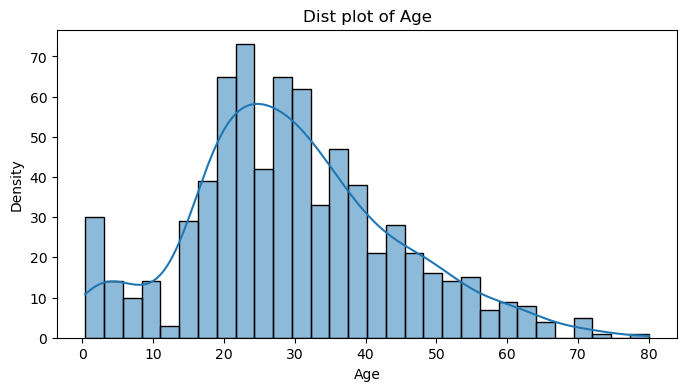

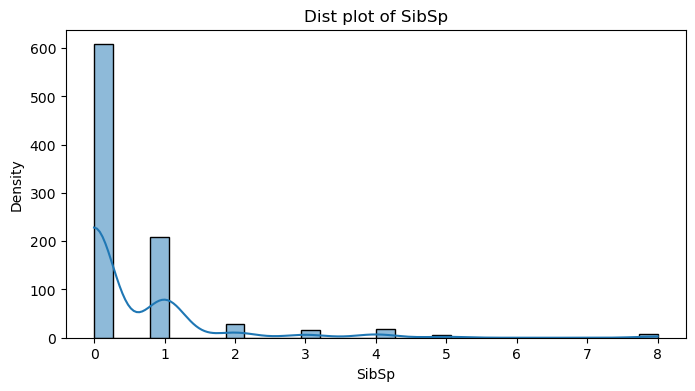

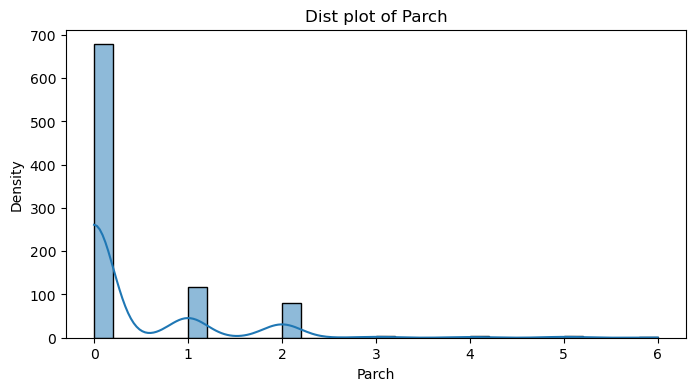

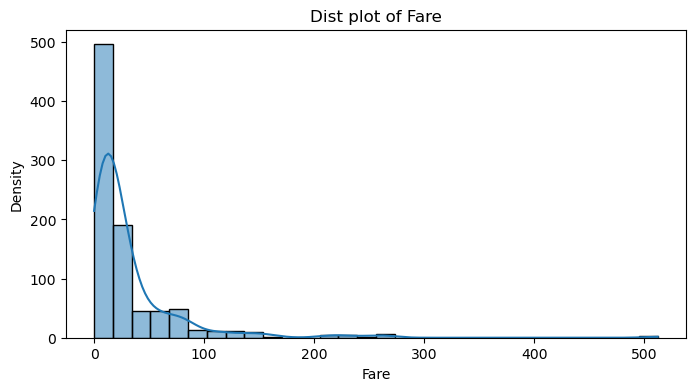

In [29]:
# Dist plot for spread visualization
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Dist plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()